# DDoS Attack Classification

**Table Of Content**

1. Importing Libraries
2. Data Pre-processing
3. Data Exploring
4. Data Splitting
5. Model Training
6. Model Evaluation



*Data link to download*: https://github.com/AlperKaan35/SDN-Dataset

**Feature Descriptions Of Data**

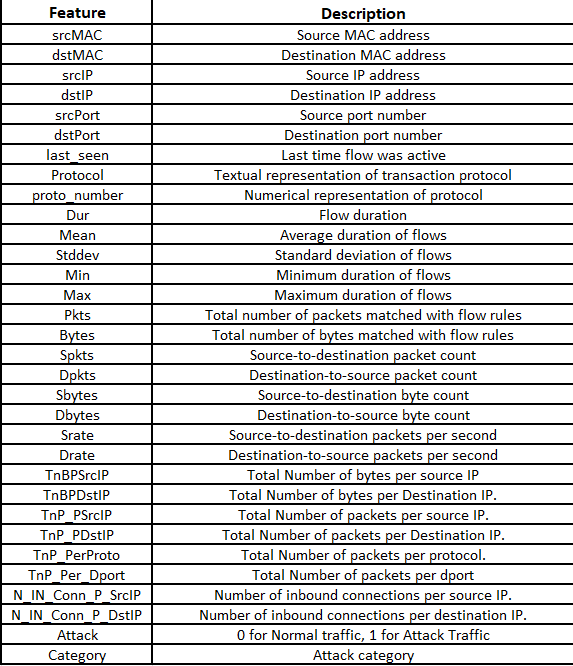

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Exploring

In [2]:
df = pd.read_csv("AlperKaan35_SDN-Dataset/dataset/35000_each.csv")

In [3]:
df.shape

(210000, 33)

In [4]:
df.head()

,srcMAC,dstMAC,srcIP,dstIP,srcPort,dstPort,last_seen,Protocol,proto_number,Dur,...,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Attack,Category
0,62:63:08:41:9A:24,56:B8:2E:2E:46:16,10.0.0.11/32,10.0.0.5/32,2000.0,36242.0,1.589146e+12,tcp,6.0,4.0,...,1.150094e+07,1.314393e+07,24334.125000,27810.428571,97336.5,21630.333333,1.857143,1.857143,0.0,0.0
1,DE:C9:3B:90:6C:4C,4A:63:48:D2:2B:1E,10.0.0.7/32,10.0.0.11/32,32956.0,2000.0,1.589586e+12,tcp,6.0,0.0,...,7.731789e+03,9.522987e+05,10.612991,1307.166667,3921.5,560.214286,126.000000,126.000000,0.0,0.0
2,96:83:14:32:AB:D9,0E:36:27:66:7F:37,10.0.0.11/32,10.0.0.12/32,12345.0,59008.0,1.589331e+12,tcp,6.0,638.0,...,1.066668e+07,1.200001e+07,15265.777778,17174.000000,68696.0,4906.857143,8.875000,8.875000,0.0,0.0
3,6A:E9:26:89:43:77,1E:16:7B:2B:55:E5,10.0.0.8/32,10.0.0.11/32,37226.0,2000.0,1.589142e+12,tcp,6.0,9.0,...,4.327943e+07,5.193532e+07,61882.833333,74259.400000,185648.5,53042.428571,1.800000,1.800000,0.0,0.0
4,DA:65:FD:00:99:B6,62:63:08:41:9A:24,10.0.0.12/32,10.0.0.11/32,60684.0,12345.0,1.589149e+12,tcp,6.0,1186.0,...,2.653780e+07,3.096077e+07,36440.428571,42513.833333,127541.5,31885.375000,1.833333,1.833333,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   srcMAC             210000 non-null  object 
 1   dstMAC             210000 non-null  object 
 2   srcIP              210000 non-null  object 
 3   dstIP              210000 non-null  object 
 4   srcPort            203308 non-null  float64
 5   dstPort            203308 non-null  float64
 6   last_seen          210000 non-null  float64
 7   Protocol           210000 non-null  object 
 8   proto_number       210000 non-null  float64
 9   Dur                210000 non-null  float64
 10  Mean               210000 non-null  float64
 11  Stddev             210000 non-null  float64
 12  Min                210000 non-null  float64
 13  Max                210000 non-null  float64
 14  Pkts               210000 non-null  float64
 15  Bytes              210000 non-null  float64
 16  Sp

**Category Labels**

0:Normal, 1:DoS, 2:DDoS, 3:Port Scanning, 4:OS Fingerprinting, 5:Fuzzing

In [6]:
df.loc[:,'Category'].unique()

array([0., 1., 2., 3., 4., 5.])

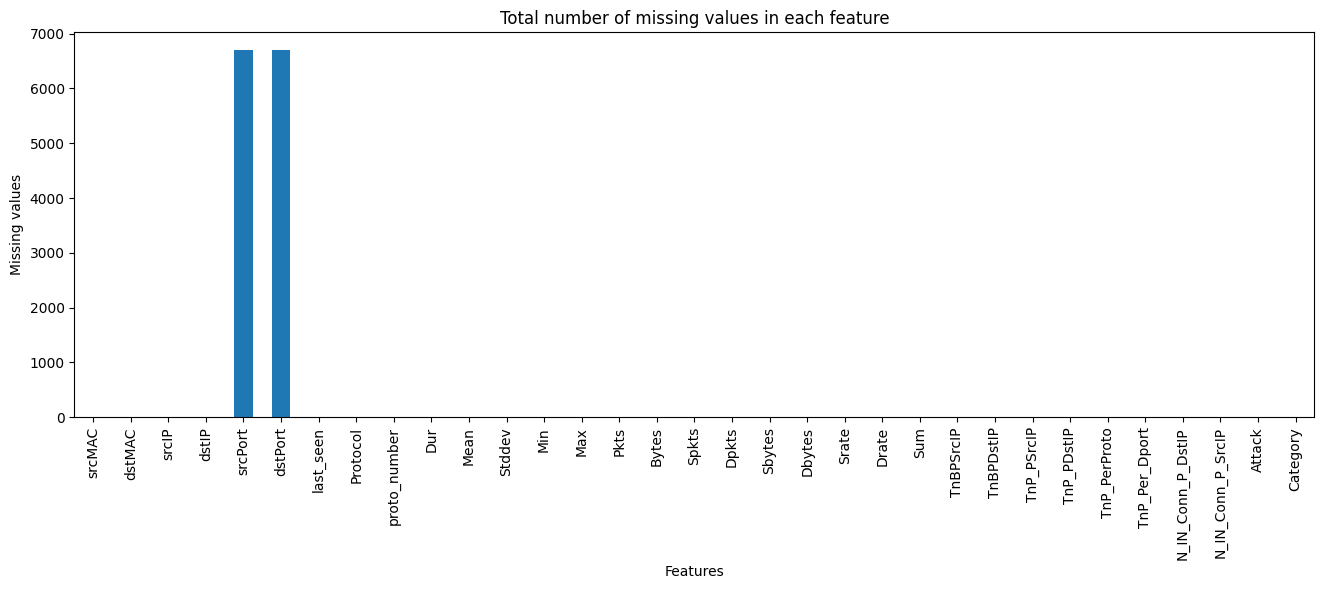

In [7]:
# Checking the null values in the dataset
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum() # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind="bar")
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of missing values in each feature")
    plt.show()

plotMissingValues(df)

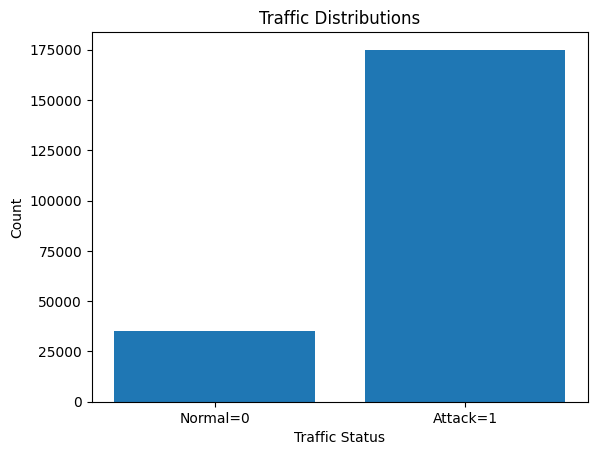

In [8]:
def plotTrafficDistribution(df):
    count_zeros = (df['Attack'] == 0).sum()
    count_ones = (df['Attack'] == 1).sum()

    labels = ['Normal=0', 'Attack=1']
    counts = [count_zeros, count_ones]

    plt.bar(labels, counts)
    plt.xlabel('Traffic Status')
    plt.ylabel('Count')
    plt.title('Traffic Distributions')
    plt.show()

plotTrafficDistribution(df)


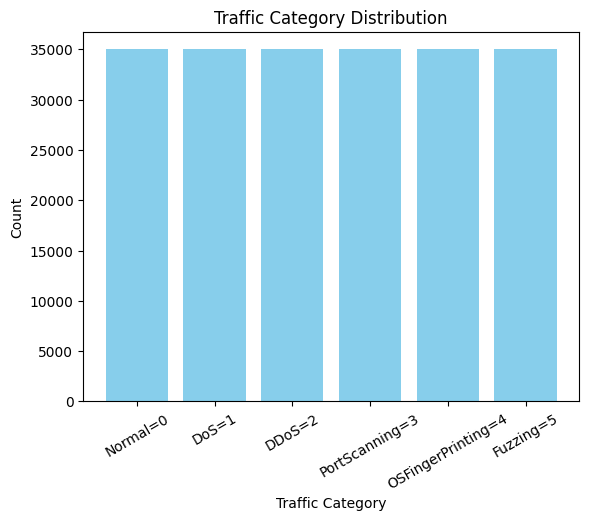

In [9]:
import matplotlib.pyplot as plt

def plotTrafficCategoryDist(df):
    # Count all categories automatically
    counts = df['Category'].value_counts().sort_index()

    # Define labels (mapping index to names)
    label_map = {
        0: 'Normal=0',
        1: 'DoS=1',
        2: 'DDoS=2',
        3: 'PortScanning=3',
        4: 'OSFingerPrinting=4',
        5: 'Fuzzing=5'
    }
    labels = [label_map[i] for i in counts.index]

    # Plot
    plt.bar(labels, counts.values, color='skyblue')
    plt.xlabel('Traffic Category')
    plt.ylabel('Count')
    plt.title('Traffic Category Distribution')
    plt.xticks(rotation=30)  # rotate labels for readability
    #plt.show()

# Call the function
plotTrafficCategoryDist(df)


## Data Preprocessing

In [10]:
# Binary target: DDoS = 1, others = 0
is_ddos = np.where(df['Category'] == 2, 1, 0)

# Drop features
df_2 = df.drop(['srcMAC', 'dstMAC', 'srcIP', 'dstIP', 'srcPort', 'dstPort', 'Protocol', 'Category', 'Attack'], axis=1)
df_2['DDoS'] = is_ddos

In [11]:
df_2.isna().sum()

last_seen            0
proto_number         0
Dur                  0
Mean                 0
Stddev               0
Min                  0
Max                  0
Pkts                 0
Bytes                0
Spkts                0
Dpkts                0
Sbytes               0
Dbytes               0
Srate                0
Drate                0
Sum                  0
TnBPSrcIP            0
TnBPDstIP            0
TnP_PSrcIP           0
TnP_PDstIP           0
TnP_PerProto         0
TnP_Per_Dport        0
N_IN_Conn_P_DstIP    0
N_IN_Conn_P_SrcIP    0
DDoS                 0
dtype: int64

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   last_seen          210000 non-null  float64
 1   proto_number       210000 non-null  float64
 2   Dur                210000 non-null  float64
 3   Mean               210000 non-null  float64
 4   Stddev             210000 non-null  float64
 5   Min                210000 non-null  float64
 6   Max                210000 non-null  float64
 7   Pkts               210000 non-null  float64
 8   Bytes              210000 non-null  float64
 9   Spkts              210000 non-null  float64
 10  Dpkts              210000 non-null  float64
 11  Sbytes             210000 non-null  float64
 12  Dbytes             210000 non-null  float64
 13  Srate              210000 non-null  float64
 14  Drate              210000 non-null  float64
 15  Sum                210000 non-null  float64
 16  Tn

In [13]:
df_2['DDoS'].unique()

array([0, 1])

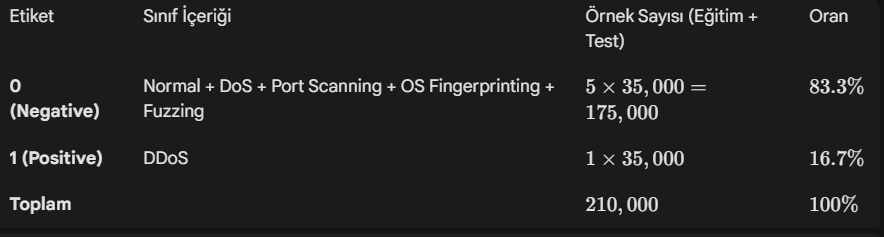

In [14]:
df_2.corr()['DDoS'].sort_values(ascending=False)

DDoS                 1.000000
last_seen            0.647099
N_IN_Conn_P_SrcIP    0.400840
N_IN_Conn_P_DstIP    0.397952
TnP_Per_Dport        0.318685
proto_number         0.284195
Srate                0.227270
Pkts                 0.224244
TnP_PerProto         0.195309
Drate                0.187860
Spkts                0.187099
TnP_PSrcIP           0.164693
Dpkts                0.159228
TnP_PDstIP           0.156214
Sbytes               0.102558
Dbytes               0.085491
Bytes                0.043900
Sum                  0.030909
Mean                 0.027290
Min                 -0.000226
TnBPSrcIP           -0.000518
Stddev              -0.014528
TnBPDstIP           -0.027506
Dur                 -0.058368
Max                 -0.128072
Name: DDoS, dtype: float64

## Data Splitting

In [15]:
# Split data into features and target variable
X = df_2.drop('DDoS', axis=1)
y = df_2['DDoS']
# Split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
print("The train dataset size: ", X_train.shape)
print("The test dataset size: ", X_test.shape)

The train dataset size:  (147000, 24)
The test dataset size:  (63000, 24)


## Model Training

### Random Forest

In [17]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [18]:
# accuracy of the test set
accuracy_score(y_test, rf_pred)

0.9984444444444445

In [19]:
rf_train_pred = rf_model.predict(X_train)

In [20]:
accuracy_score(y_train, rf_train_pred)

0.9986802721088436

In [21]:
# Random Forest with max_depth parameter to avoid overfitting
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [22]:
accuracy_score(y_test, rf_pred)

0.9958095238095238

In [23]:
rf_train_pred = rf_model.predict(X_train)

In [24]:
accuracy_score(y_train, rf_train_pred)

0.9956666666666667

In [25]:
confusion_matrix(y_test, rf_pred)

array([[52243,   257],
       [    7, 10493]])

In [26]:
# Random Forest with class_weight parameter
rf_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=10, 
    random_state=42, 
    class_weight='balanced' 
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [27]:
accuracy_score(y_test, rf_pred)

0.9949365079365079

In [28]:
rf_train_pred = rf_model.predict(X_train)

In [29]:
accuracy_score(y_train, rf_train_pred)

0.9945986394557823

In [30]:
confusion_matrix(y_test, rf_pred)

array([[52183,   317],
       [    2, 10498]])

In [31]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     52500
           1       0.97      1.00      0.99     10500

    accuracy                           0.99     63000
   macro avg       0.99      1.00      0.99     63000
weighted avg       1.00      0.99      0.99     63000



### XGBoost

In [32]:
bst = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective='binary:logistic', scale_pos_weight=5, random_state=42)
bst.fit(X_train, y_train)
# make predictions
bst_pred = bst.predict(X_test)

In [33]:
accuracy_score(y_test, bst_pred)

0.9979365079365079

In [34]:
bst_train_pred = bst.predict(X_train)

In [35]:
accuracy_score(y_train, bst_train_pred)

0.9978163265306123

In [36]:
confusion_matrix(y_test, bst_pred)

array([[52371,   129],
       [    1, 10499]])